## 1. Case Study Introduction
This case study aims to give an idea of applying Machine Learning Classification to a real-time scenario. Classification involves separating the data into groups for further use. In the medical field, the most obvious use for it is in medical imaging and medical diagnosis.
Here, we will be developing a basic machine-learning classification model for a real-time medical diagnosis problem to identify whether a person is diabetic or not.

### 1.1 Problem Statament
Health condition diagnosis is an essential and critical aspect for healthcare professionals. Classification of a diabetes type is one of the most complex phenomena for healthcare professionals and comprises several tests. However, analysing multiple factors at the time of diagnosis can sometimes lead to inaccurate results. Therefore, the interpretation and classification of diabetes are very challenging tasks.
Diabetes is a chronic disease with the potential to cause a worldwide healthcare crisis. It is caused due to the increased level of blood glucose. Generally, diabetics are classified as type 1 and type 2, and gestational diabetes. Presently with the ascent of machine learning, AI and neural systems and their application help the Medical domain enhance medical diagnosis dramatically. In this case study, you need to create an ML classification model that yields better results in identifying whether a person is diabetic or not.

## 1.2 Data Understanding
- The data set comprises of 768 cases and the objective is to predict base on the measures to predict if the patient is diabetic or not. The data set
  contains the comparison of 8 medical analyst variables and one Target variable say 'outcome'. The ‘outcome’ is the feature we are going to predict-
  ‘0’ means no diabetes ‘1’ means diabetes.

- The colums are as follows:
  - Pregnancies: Number of times pregnant
  - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  - Blood Pressure: Diastolic blood pressure (mm Hg)
  - Skin Thickness: Triceps skin fold thickness (mm)
  - Insulin: 2-Hour serum insulin (mu U/ml)
  - BMI: Body mass index (weight in kg/(height in m)^2)
  - Diabetes Pedgree Function: Diabetes pedigree function
  - Age: Age in years
  - Outcome: Class variable (0 or 1)

## 2. Data Exploration

### 2.1 Read the Data File
- We will first read the data file which includes importing the required libraries, loading the dataset & viewing it.

In [1]:
# import the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datasets train & test
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#viewing the first 5 rows of train df
train_df.head(5)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [4]:
# viewing the first 5 rows of test df
test_df.head(5)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


### 2.2 Inspect the Data Frame
- Next we will check the various attributes like shape (rows and cols) & datatypes

In [5]:
train_df.shape

(614, 10)

In [6]:
test_df.shape

(154, 9)

In [9]:
# check the data type of all columns
train_df.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

In [10]:
# check the data type of all columns
test_df.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
dtype: object

- We will check for data imbalance in training dataset to ensure that the model learns to recognize the minority class. This is because if the
  training data is severely imbalanced (e.g., 95% non-diabetic and 5 % diabetic), the model will often become lazy and simply predict the majority
  class (0) for almost every instance.

In [12]:
train_df['diabetes'].value_counts()

diabetes
0    400
1    214
Name: count, dtype: int64

In [14]:
train_df['diabetes'].value_counts()/len(train_df) * 100

diabetes
0    65.14658
1    34.85342
Name: count, dtype: float64

- Next we will check null values per column for both the datasets.

In [3]:
#check null value per col
#Count null values per column
null_count = train_df.isnull().sum()
# get no of rows
total_count = train_df.shape[0]
# Calculate percentage of nulls and round to 2 decimal places
null_pct = ((null_count / total_count) * 100).round(2)
#Filter only columns with missing values (makes plot cleaner)
null_pct = null_pct[null_pct > 0].sort_values(ascending=False)
null_pct

Series([], dtype: float64)

In [4]:
null_count2 = test_df.isnull().sum()
total_count2 = test_df.shape[0]
null_pct2 = ((null_count2 / total_count2) * 100).round(2)
null_pct2 = null_pct2[null_pct2 > 0].sort_values(ascending=False)
null_pct2

Series([], dtype: float64)

## 3. Data Cleaning

### 3.1 Data Imputation

- We will check if any of the columns has zero as often zero indicates a placeholder in a column which should be replaced.

In [7]:
# Get a boolean series where True means the column has at least one zero
cols_with_zero = (train_df == 0).any()

# Filter the boolean series to get only the column names (index) that are True
list_of_cols_with_zero = cols_with_zero[cols_with_zero].index.tolist()

list_of_cols_with_zero

['no_times_pregnant',
 'glucose_concentration',
 'blood_pressure',
 'skin_fold_thickness',
 'serum_insulin',
 'bmi',
 'diabetes']

In [8]:
# Get a boolean series where True means the column has at least one zero
cols_with_zero = (test_df == 0).any()

# Filter the boolean series to get only the column names (index) that are True
list_of_cols_with_zero = cols_with_zero[cols_with_zero].index.tolist()

list_of_cols_with_zero

['no_times_pregnant',
 'glucose_concentration',
 'blood_pressure',
 'skin_fold_thickness',
 'serum_insulin',
 'bmi']

- We will impute the zeros for the columns below:
  - glucose_concentration
  - blood_pressure
  - skin_fold_thickness
  - serum_insulin
  -  bmi

In [9]:
# List of columns where 0 is treated as a missing value
cols_to_impute = ['glucose_concentration', 'blood_pressure', 
                  'skin_fold_thickness', 'serum_insulin', 'bmi']

for col in cols_to_impute:
    # Replace all '0' values in these columns with NaN (Not a Number)
    train_df[col].replace(0, np.nan, inplace=True)
    test_df[col].replace(0, np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16204\1768913001.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].replace(0, np.nan, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16204\1768913001.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

- Next we will impute the null values with the median

In [6]:
# Impute the NaN values with the median of the respective column
# The median is less sensitive to remaining outliers than the mean
for col in cols_to_impute:
    median_value = train_df[col].median()   # IMPORTANT: median from TRAIN only!
    train_df[col].fillna(median_value, inplace=True)
    test_df[col].fillna(median_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14880\1730048834.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14880\1730048834.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

### 3.2 Outlier Analysis
- Next we are going to detect and possibly remove outliers from our dataset. Outliers are values that are unusually high or low compared to the rest of
  the data.  
- Firstly we will perform IQR Rule followed by visualizations using boxplots for each column.

In [10]:
outlier_cols = ['no_times_pregnant','glucose_concentration','blood_pressure','skin_fold_thickness','serum_insulin',
                'bmi','diabetes pedigree','age']
 
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers), lower, upper

# Summary
outlier_summary = []
for col in outlier_cols:
    n_out, low, up = find_outliers(train_df, col)
    pct = n_out / len(train_df) * 100
    outlier_summary.append({
        'Column': col,
        'Outliers': n_out,
        '%': round(pct, 2),
        'Lower': round(low, 2),
        'Upper': round(up, 2)
    })
    
summary_df = pd.DataFrame(outlier_summary)
print(summary_df)

                  Column  Outliers     %  Lower   Upper
0      no_times_pregnant         3  0.49  -6.50   13.50
1  glucose_concentration         0  0.00  41.50  197.50
2         blood_pressure         9  1.47  40.00  104.00
3    skin_fold_thickness         2  0.33   1.00   57.00
4          serum_insulin        20  3.26 -90.00  358.00
5                    bmi         6  0.98  13.30   50.90
6      diabetes pedigree        26  4.23  -0.32    1.17
7                    age         9  1.47  -1.50   66.50


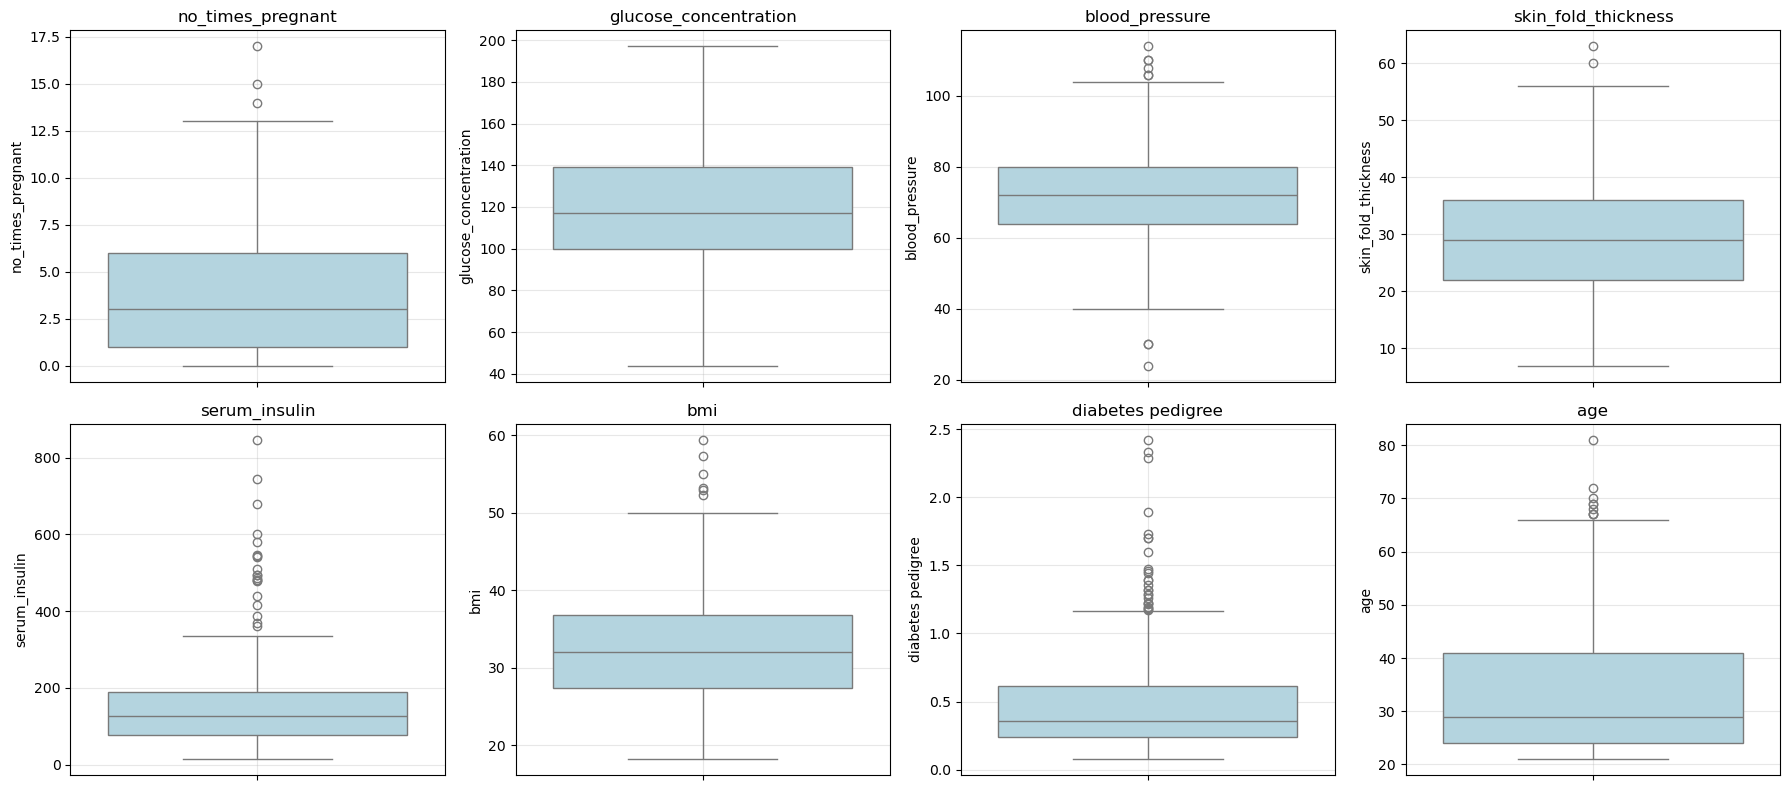

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

for i, col in enumerate(outlier_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color='lightblue')
    axes[i].set_title(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Define the list of all numeric columns to apply capping to
# These are the columns from your outlier analysis table.
cap_cols = [
    'no_times_pregnant', 
    'blood_pressure', 
    'serum_insulin', 
    'bmi', 
    'diabetes pedigree', 
    'age',
    'skin_fold_thickness'
]

# Capping (Winsorizing) using the 1.5 * IQR fences
for col in cap_cols:
    # 1. Calculate Quartiles and IQR
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 2. Calculate the Statistical Lower and Upper Fences
    lower_calc = Q1 - 1.5 * IQR
    upper_calc = Q3 + 1.5 * IQR
    
    # 3. Determine the Final Lower Clip (Flooring) Value
    # This addresses the negative bounds you observed.
    # If the calculated lower bound is negative (e.g., -6.50), it uses 0.
    # If the calculated lower bound is positive (e.g., 39.00), it uses 39.00.
    lower_clip_final = max(0, lower_calc)
    
    # # Apply SAME bounds to both train and test
    train_df[col] = train_df[col].clip(lower=lower_clip_final, upper=upper_calc)
    test_df[col]  = test_df[col].clip(lower=lower_clip_final, upper=upper_calc)

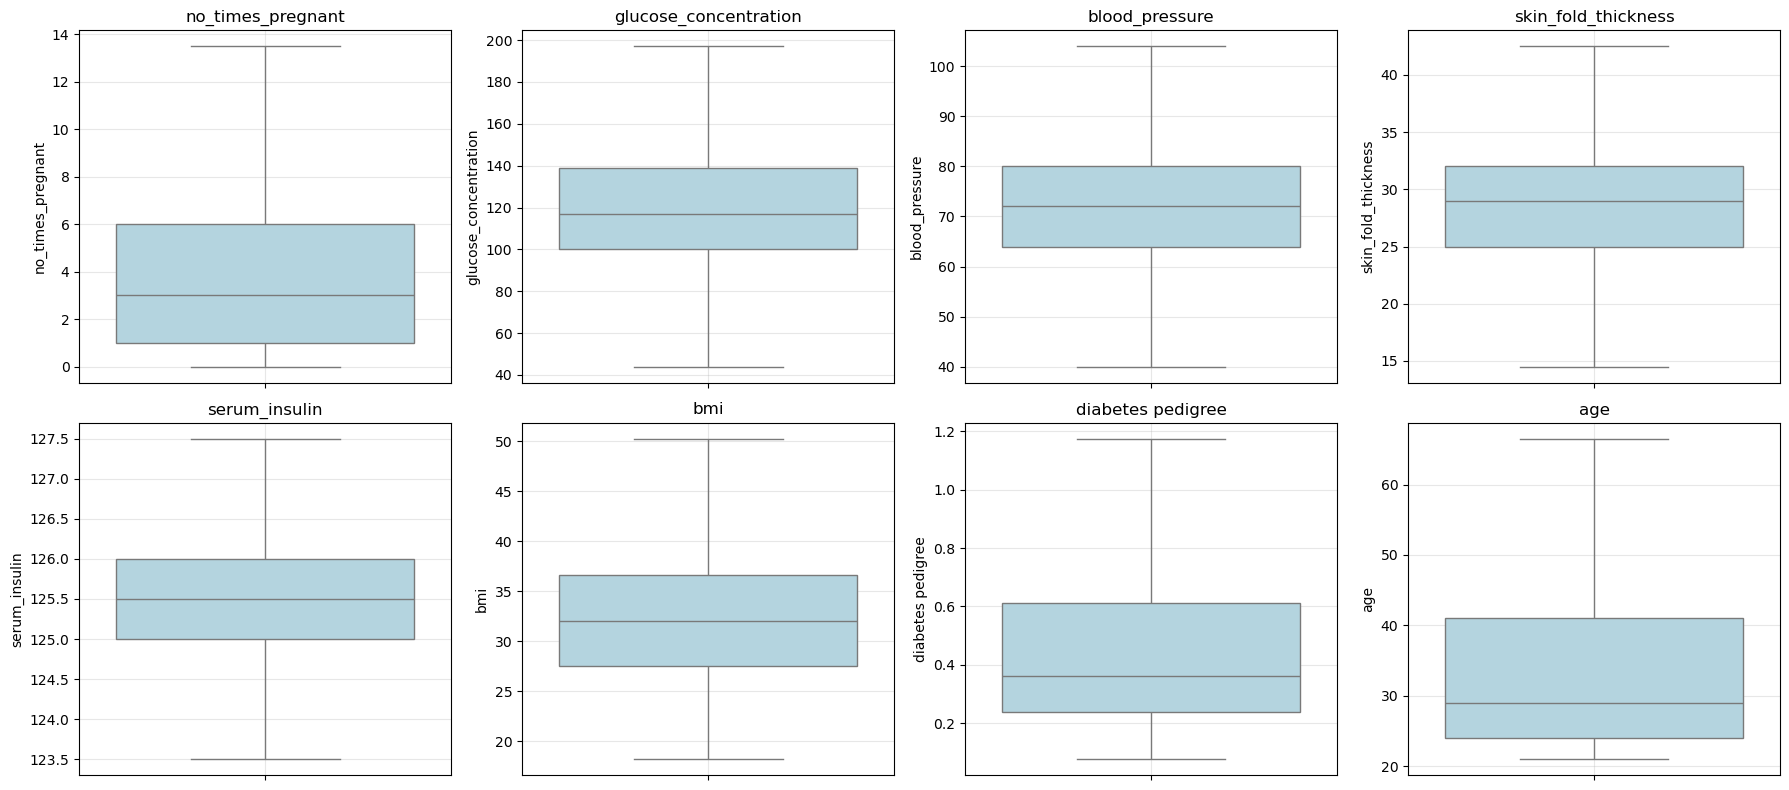

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.ravel()

for i, col in enumerate(outlier_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color='lightblue')
    axes[i].set_title(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Data Analysis
- We will perform segmented univariate and correlation.

### Segmented Univariate
- We will perform this analysis using KDE plot.
- When the blue peak (diabetic) is higher than the red peak (non-diabetic), the density of diabetics is higher for that particular feature.

In [13]:
df0 = train_df[train_df['diabetes'] == 0]
df1 = train_df[train_df['diabetes'] == 1]

In [14]:
def cont_plot(col_x):
    plt.figure(figsize=(8,6))
    
    # 1. Use plt.gca() to get the current Axes object for the first plot
    #    and assign it to 'ax'.
    ax = sns.kdeplot(
        df0[col_x], 
        label="Non-diabetic",
        color="Red",
        fill=True
    )
    
    # 2. Plot the second distribution, referencing the same axes object 'ax'
    #    to ensure they are overlaid correctly.
    ax = sns.kdeplot(
        df1[col_x], 
        label="Diabetic", 
        color="Blue",
        ax=ax, 
        fill=True
    )
    
    # 3. Create the title and labels
    plt.title(f"Outcome Distribution by {col_x}")
    plt.xlabel(col_x)
    plt.ylabel("Density")
    plt.legend()
    
    # 4. Show the plot
    plt.show()

### no_times_pregnant

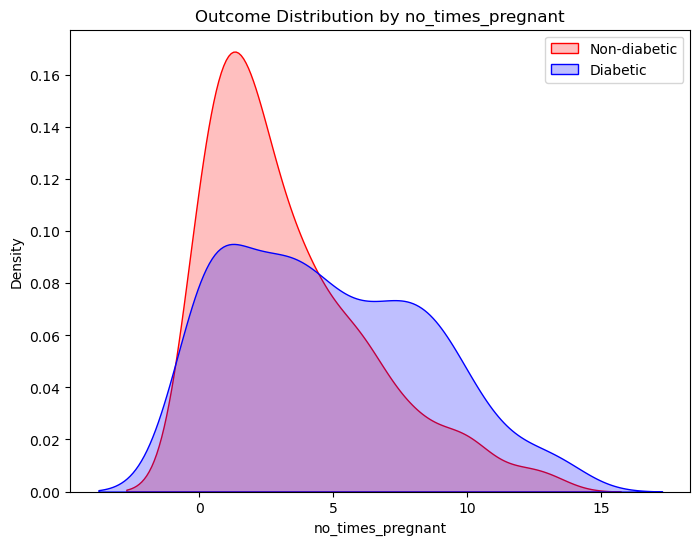

In [15]:
cont_plot('no_times_pregnant')

- Those pregnant between 5 to 15 times have a higher density of diabetics.

### glucose_concentration

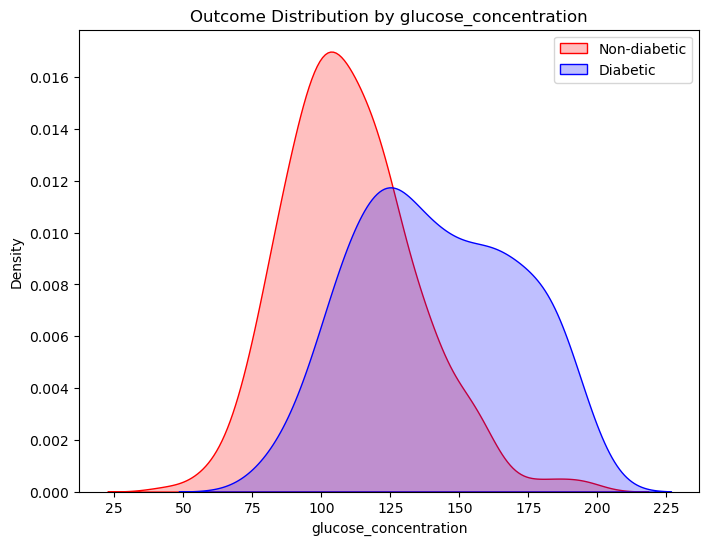

In [13]:
cont_plot('glucose_concentration')

- Those having glucose concentration between 150 to 225 mg/dl have a higher density of diabetics.

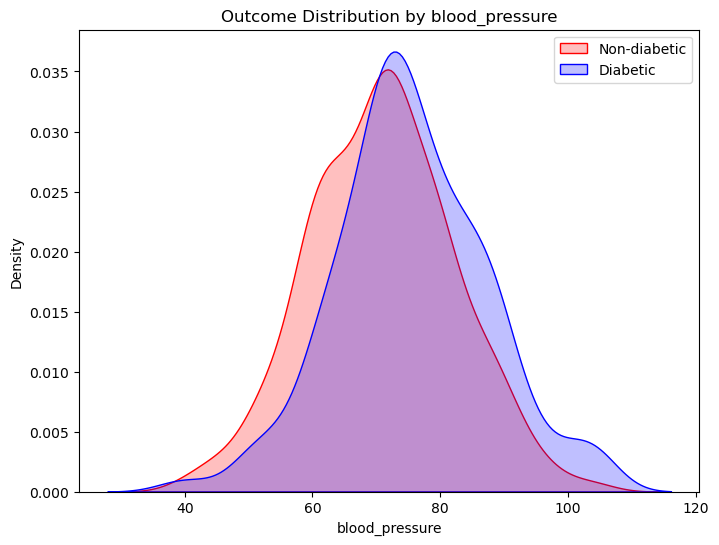

In [14]:
cont_plot('blood_pressure')

- Those having blood pressure >80 mmHg have a higher density of diabetics.

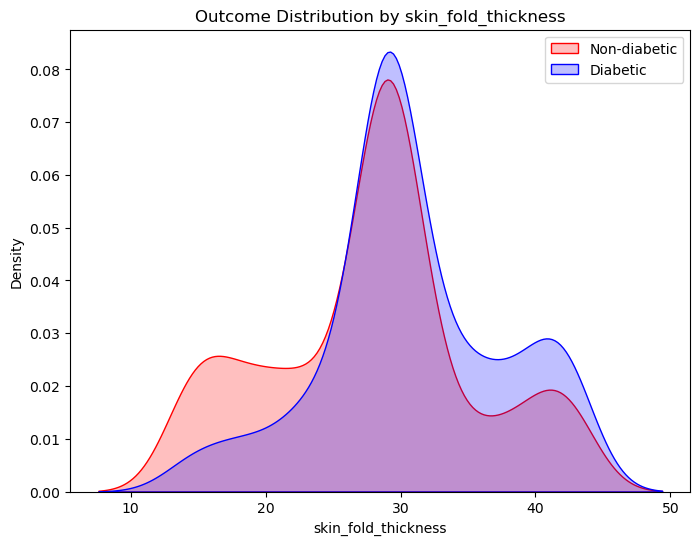

In [15]:
cont_plot('skin_fold_thickness')

- Those having skin fold thickness > 30 mm have a higher density of diabetics.

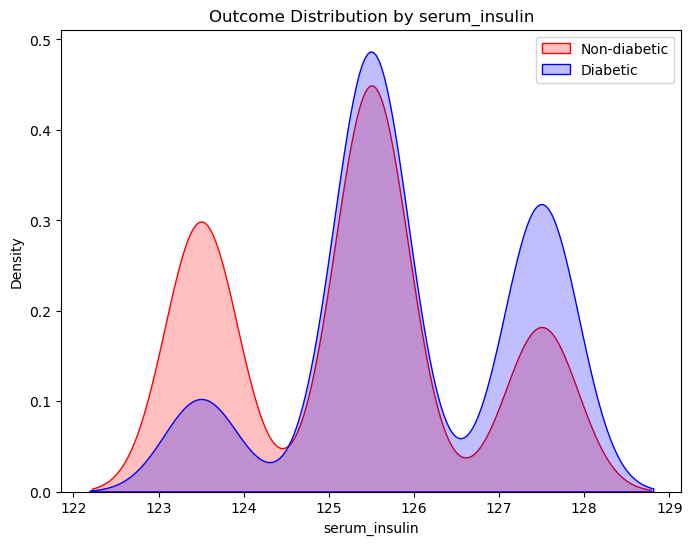

In [16]:
cont_plot('serum_insulin')

- Those having serum insulin of 125.7 or 127.5 U/mL have a higher density of diabetics.

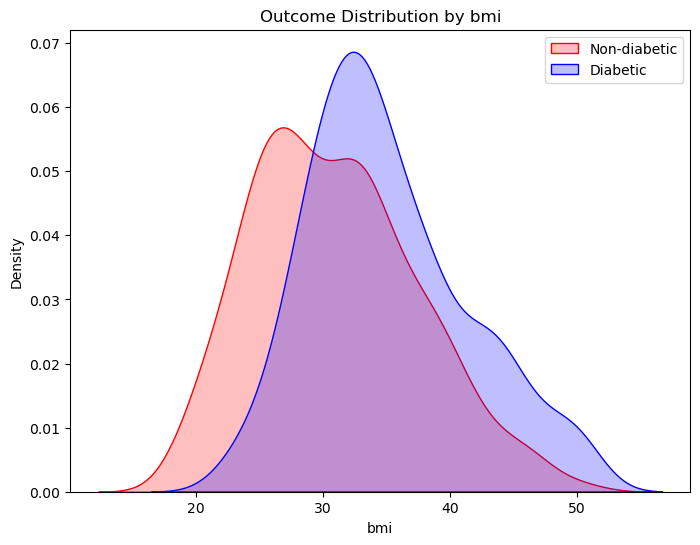

In [17]:
cont_plot('bmi')

- Those having bmi > 30 have a higher density of diabetics.

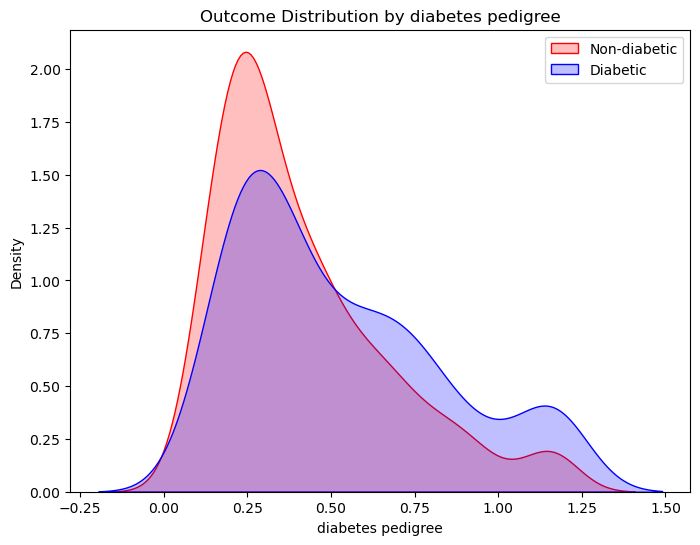

In [18]:
cont_plot('diabetes pedigree')

- Those having diabetes pedigree > 0.50 has a higher density of diabetics.

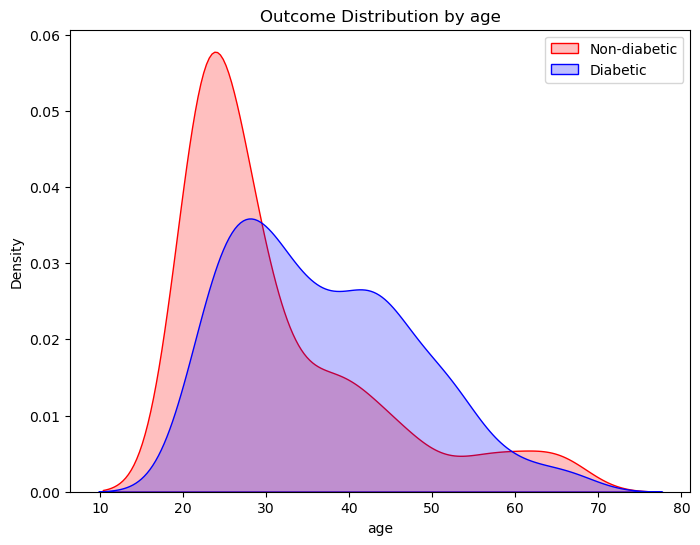

In [19]:
cont_plot('age')

- Those with ages between 35 to 58 have a higher density of diabetics.

### Correlation
- We will find out the correlation between each columns to understand the relationship between each other.

<Axes: title={'center': 'Correlation Heatmap'}>

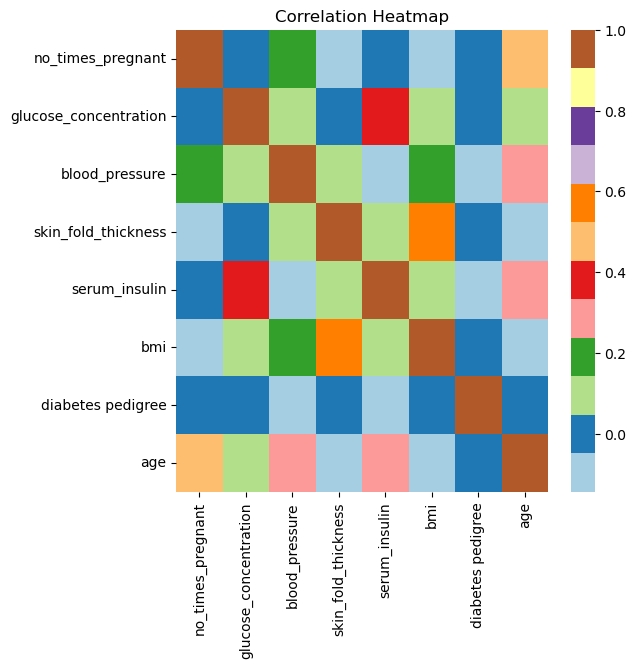

In [16]:
plt.figure(figsize=(6,6))
numeric_df = df1.drop(columns=['p_id','diabetes'])
plt.title('Correlation Heatmap')
sns.heatmap(numeric_df.corr(),cmap='Paired')

- All the correlations are lesser than 0.6 indicating a moderately positive to weak positive correlations as well as negatives.

## 5.Predictive Analytics
- We will use classification algorithms such as KNN, Decision Tree, Random Forest

- We will drop the ids before we proceed to the predictive analytics.
- The ids need to be dropped since they hold no predictive power. It has no logical relationship with the target variable.

In [21]:
# drop the ids from test_df
test_df.drop('p_id', axis=1, inplace=True)
train_df.drop('p_id', axis=1, inplace=True)

KeyError: "['p_id'] not found in axis"

- Firstly, we will do train/validation split.
- We will split training data into:
  - X_train, y_train -> For model training
  - X_val, y_val → For model validation / checking performance

In [22]:
from sklearn.model_selection import train_test_split
X = train_df.drop('diabetes',axis=1)
y = train_df['diabetes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

- Next we will perform scaling using StandardScaler.
  - Fit only training data
  - Transform validation and test data using the same scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)

- Next we will train our model using KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_sc, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

- Next we will evaluate on validation set using multiple evaluation metrics.
  - Accuracy: To determine the overall correctness of the model.
  - Precision: To determine how many predicted diabetics are actually diabetic.
  - Recall: To measure how well the model detects real diabetic patients.
  - F1-score: Balances precision and recall, useful when classes are imbalanced.
  - Confusion Matrix: Shows exact counts of correct and incorrect predictions.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

val_pred = model.predict(X_val_sc)

print("KNN Model Evaluation Metrics:")
print("--------------------------")
print("Accuracy:", accuracy_score(y_val, val_pred) * 100, "%")
print("Precision:", precision_score(y_val, val_pred) * 100, "%")
print("Recall:", recall_score(y_val, val_pred) * 100, "%")
print("F1-score:", f1_score(y_val, val_pred) * 100, "%")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, val_pred)
print(cm)

KNN Model Evaluation Metrics:
--------------------------
Accuracy: 72.07792207792207 %
Precision: 66.66666666666666 %
Recall: 51.724137931034484 %
F1-score: 58.252427184466015 %

Confusion Matrix:
[[81 15]
 [28 30]]


- The model achieves 72% accuracy, but it struggles to detect all diabetic patients due to a relatively low recall (51%).
  While it is fairly reliable when predicting someone as diabetic (precision 66.7%), it still misses many real diabetic cases, which reduces the F1
  score (58.25%). The confusion matrix confirms this pattern, showing a high number of false negatives (28).

- Next we will continue the same steps using Decision Tree

In [25]:
# Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
val_pred = model_dt.predict(X_val_sc)

print("Decision Tree Model Evaluation Metrics:")
print("--------------------------")
print("Accuracy:", accuracy_score(y_val, val_pred) * 100, "%")
print("Precision:", precision_score(y_val, val_pred) * 100, "%")
print("Recall:", recall_score(y_val, val_pred) * 100, "%")
print("F1-score:", f1_score(y_val, val_pred) * 100, "%")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, val_pred)
print(cm)

Decision Tree Model Evaluation Metrics:
--------------------------
Accuracy: 69.48051948051948 %
Precision: 62.7906976744186 %
Recall: 46.55172413793103 %
F1-score: 53.46534653465347 %

Confusion Matrix:
[[80 16]
 [31 27]]


- This model is achieving only 69.48% accuracy. Precision is moderate (62.79%), but recall is low (46.55%), meaning the model fails to detect more than   half of the true diabetic cases. The F1 score is also low (53.47%), indicating an imbalance between precision and recall. The confusion matrix
  confirms this, with a high number of false negatives (31), showing that many diabetic patients are being missed.

- We will also perform Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

In [28]:
model_rf.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

In [35]:
val_pred = model_rf.predict(X_val_sc)

print("Random Forest Model Evaluation Metrics:")
print("--------------------------")
print("Accuracy:", accuracy_score(y_val, val_pred) * 100, "%")
print("Precision:", precision_score(y_val, val_pred) * 100, "%")
print("Recall:", recall_score(y_val, val_pred) * 100, "%")
print("F1-score:", f1_score(y_val, val_pred) * 100, "%")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, val_pred)
print(cm)

Random Forest Model Evaluation Metrics:
--------------------------
Accuracy: 79.22077922077922 %
Precision: 76.0 %
Recall: 65.51724137931035 %
F1-score: 70.37037037037037 %

Confusion Matrix:
[[84 12]
 [20 38]]


- This model shows stronger performance, achieving 79.22% accuracy. It predicts diabetic cases with good reliability (precision 76%) while also
  detecting a larger portion of actual diabetic patients (recall 65.5%). The F1-score of 70.37% confirms a good balance between precision and recall.
  The confusion matrix also supports this, showing more true positives (38) and fewer false negatives (20).

## 6. Conclusion

Confusion Matrix
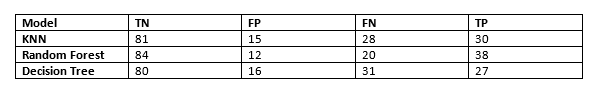

- TN: True Negatives — correctly predicted non-diabetic
- FP: False Positives — non-diabetic wrongly predicted as diabetic
- FN: False Negatives — diabetic missed by the model
- TP: True Positives — diabetic correctly predicted

KNN:
- TN = 81, FP = 15 → correctly identifies non-diabetic people, some false alarms
- FN = 28, TP = 30 → misses a significant number of diabetics, moderate performance

Random Forest:
- TN = 84, FP = 12 → very few false alarms
- FN = 20, TP = 38 → correctly identifies most diabetics, better balance

Decision Tree:
- TN = 80, FP = 16 → more false positives than Random Forest
- FN = 31, TP = 27 → misses many diabetic cases, weakest model

Random Forest is strongest in identifying diabetic cases while keeping false positives low

Table - Summarizing the metric scores
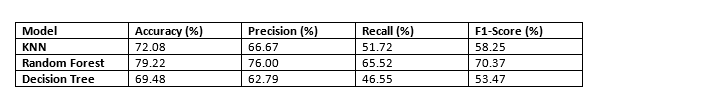 
- Random Forest outperforms the others in all metrics — highest accuracy, precision, recall, and F1-score.
- It correctly identifies more diabetic cases (higher recall) while maintaining good reliability (precision).
- KNN is moderate but misses more diabetics.
- Decision Tree performs worst, with low recall and F1-score, meaning it misses too many diabetic patients.
- Final Recommendation: Random Forest should be chosen as the best model for diabetes prediction, as it provides the most balanced and reliable
  performance. 